# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# # show figures in the notebook
%matplotlib inline 


sc.settings.set_figure_params(dpi=200) # save umaps as non-vectorial hi-res images
# plt.rcParams['figure.figsize']=(10,10) # make figures square if not using the setting bellow
sc.set_figure_params(frameon=False)



In [3]:
import sys
sys.path.append('/data/angela/src/scVI_TSP/')
sys.path.append('/data/angela/sapiens/tabula-sapiens/')
# from utils.annotations_utils import *
from utils.colorDict import *
from utils.general_utils import *
from utils.plotting_utils import *

# Load the color dictionaries

In [4]:
import matplotlib.pyplot as plt

# create a color dictionary for tissues
def tissue_colors():
    
    tissue_color_dict = {'Bladder': '#e7969c',
             'Blood': '#d6616b',
             'Bone_Marrow': '#cedb9c',
             'Eye': '#c7ea46',#"#00ff7f",
             'Ear': '#194E7D', # '#e7e694',
             'Fat': '#ECC98C', 
             'Heart': '#ff0800',
             'Kidney': '#7b4173',
             'Large_Intestine': '#31a354',
             'Liver': '#000080',
             'Lung': '#3182bd',
             'Lymph_Node': '#8c6d31',
             'Mammary':'#ce6dbd',
             'Muscle': '#e7ba52',
             'Ovary':'#e2e752',
             'Pancreas': '#fd8d3c',
             'Prostate':'#637939',#'#a55194',#
             'Salivary_Gland':'#622a0f',
             'Skin': '#de9ed6', 
             'Small_Intestine': '#6baed6',
             'Spleen': '#393b79',
             'Stomach': '#FFE200', # '#4b46cf'
             'Testis': '#626175',
             'Thymus': '#9c9ede',
             'Tongue':'#b5cf6b',
             'Trachea': '#969696',
             'Uterus':'#c64b8c',#'#ff0090',
             'Vasculature': '#843c39'}
    
    return tissue_color_dict




# create a color dictionary for donors
def donor_colors():
    donors = ['TSP1','TSP2','TSP3','TSP4','TSP5','TSP6','TSP7','TSP8','TSP9','TSP10','TSP11','TSP12','TSP13','TSP14','TSP15','TSP17','TSP19','TSP20','TSP21','TSP25','TSP26','TSP27','TSP28','TSP30']

    import matplotlib.colors as pltcolors
    
    cmap = plt.cm.get_cmap("YlGnBu")
        
    donor_color_dict = {}
    j=1/len(donors)
    for d in donors:
        donor_color_dict[d] = pltcolors.to_hex(cmap(j))
        j+=1/len(donors)
        
    return donor_color_dict


# create a color dictionary for compartments
def compartment_colors():
    
    compartments = ['Endothelium', 'Epithelium', 'Immune', 'Stroma', "Germline",'Neural']
    
    import matplotlib.colors as pltcolors
    
    cmap = plt.cm.get_cmap("YlOrRd")
        
    compartment_color_dict = {}
    j=1/len(compartments)
    for c in compartments:
        compartment_color_dict[c] = pltcolors.to_hex(cmap(j))
        j+=1/len(compartments)
        
    return compartment_color_dict


# create a color dictionary for methods
def method_colors():
    methods = ['10X','smartseq2']
    
    import matplotlib.colors as pltcolors
    
    method_color_dict = {}
    method_color_dict['10X'] = '#90ee90'
    method_color_dict['smartseq2'] = '#006400'
    
    return method_color_dict

# create a color dictionary for assay
def assay_colors():
    assays = ['10X_3Prime_v3.1','10X_5Prime_v2','smartseq2']
    
    import matplotlib.colors as pltcolors
    
    assay_color_dict = {}
    assay_color_dict['10X_3Prime_v3.1'] = '#90ee90' #green
    assay_color_dict['10X_5Prime_v2'] = '#429642'
    assay_color_dict['smartseq2'] = '#006400'
    
    return assay_color_dict

# create a color dictionary for sex
def sex_colors():
    sexes = ['male','female','undisclosed']
    
    import matplotlib.colors as pltcolors
    
    sex_color_dict = {}
    sex_color_dict['female'] = '#f4cae4'
    sex_color_dict['male'] = '#cbd5e8'
#     sex_color_dict['undisclosed'] = '#e6f5c9'
    
    return sex_color_dict

# create a color dictionary for age
def age_colors():
    
    ages = [22.0,26.0,33.0,36.0, 37.0, 38.0,
            40.0,42.0,45.0, 46.0, 55.0, 56.0, 57.0, 59.0,
            60.0, 61.0, 67.0, 69.0, 74.0]

    
    import matplotlib.colors as pltcolors
            
    age_color_dict = {}
    for a in ages:
        if a<40:
            age_color_dict[a] = '#47C16EFF'
            
        elif a<60:
            age_color_dict[a] = "#FDE725FF"
        else:
            age_color_dict[a] = "#400554FF"
            
    return age_color_dict

# visualize the color dictionaries
def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    by_hsv = [(v, k) for k, v in colors.items()]
    
    if sort_colors is True:
        by_hsv = sorted(by_hsv)
    names = [name for hsv, name in by_hsv]

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        swatch_end_x = cell_width * col + swatch_width
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.hlines(y, swatch_start_x, swatch_end_x,
                  color=colors[name], linewidth=18)

    return fig

In [5]:
donors_color_dict = donor_colors()
tissues_color_dict = tissue_colors()
methods_color_dict = method_colors()
compartments_color_dict = compartment_colors()
sex_color_dict = sex_colors()
age_color_dict = age_colors()

/tmp/ipykernel_90592/2921190753.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("YlGnBu")
/tmp/ipykernel_90592/2921190753.py:64: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("YlOrRd")


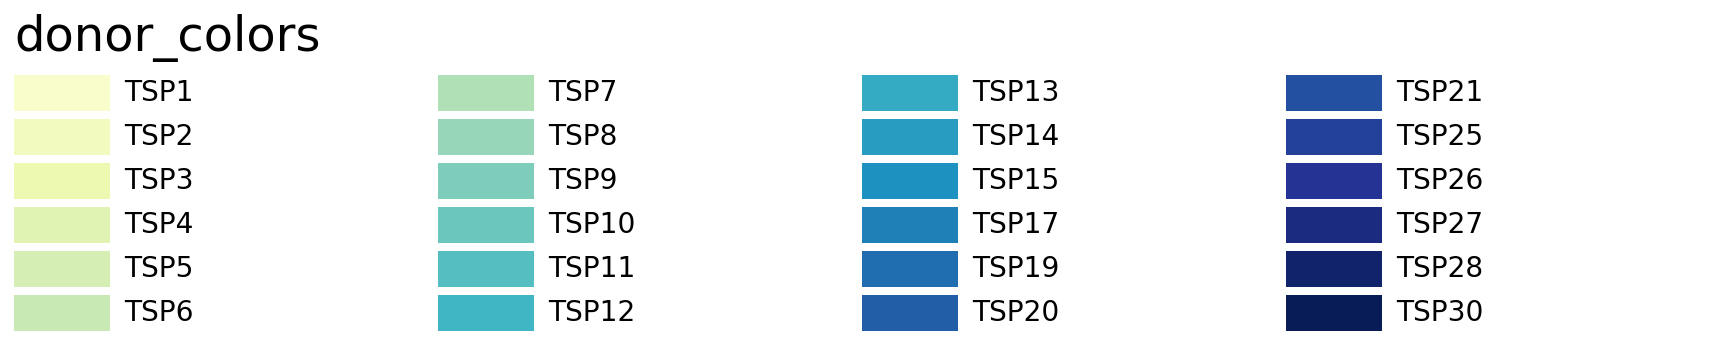

In [6]:
# display(donors_color_dict)
plot_colortable(donors_color_dict,'donor_colors',sort_colors=False)
plt.savefig("./donor_color_dict.pdf")

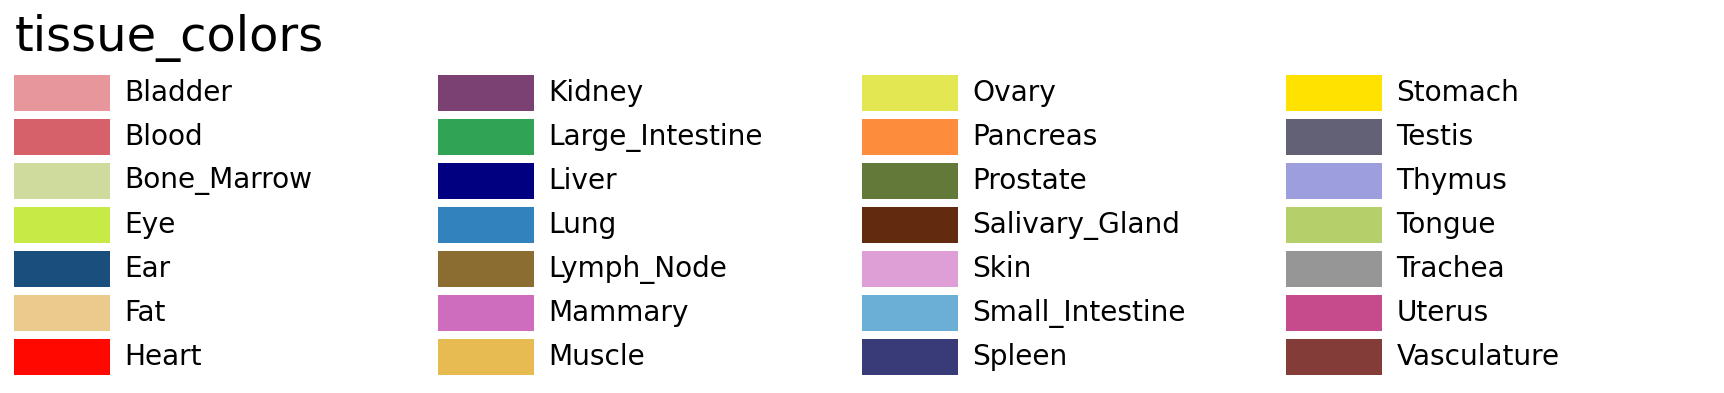

In [7]:
# display(tissues_color_dict)
plot_colortable(tissues_color_dict,'tissue_colors',sort_colors=False)
plt.savefig("./tissue_color_dict.pdf")

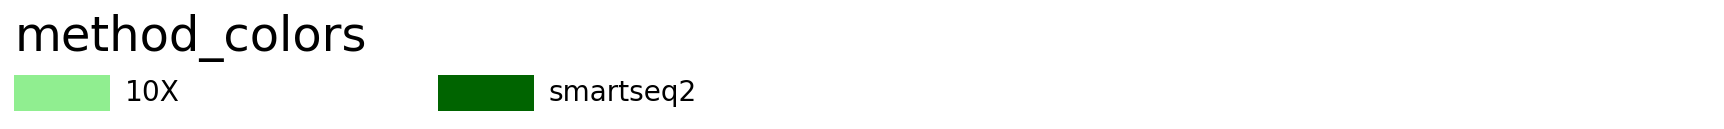

In [8]:
# display(methods_color_dict)
plot_colortable(methods_color_dict,'method_colors',sort_colors=False)
plt.savefig("./method_color_dict.pdf")

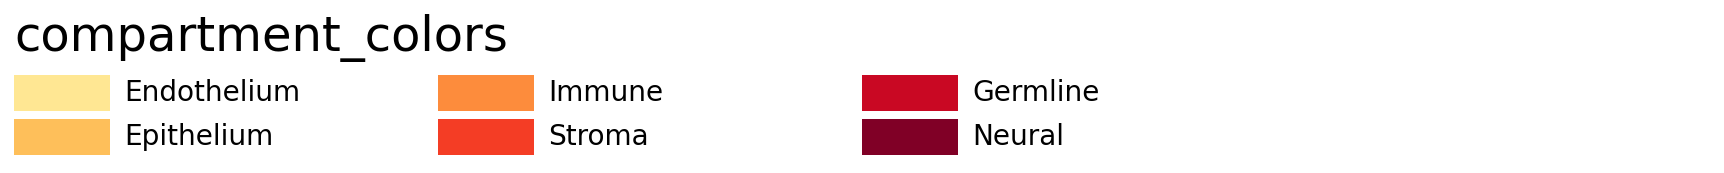

In [9]:
# display(compartments_color_dict)
plot_colortable(compartments_color_dict,'compartment_colors',sort_colors=False)
plt.savefig("./compartment_color_dict.pdf")

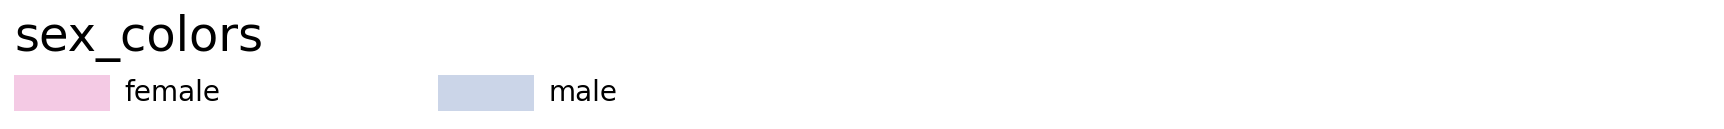

In [10]:
# display(sex_color_dict)
plot_colortable(sex_color_dict,'sex_colors',sort_colors=False)
plt.savefig("./sex_color_dict.pdf")

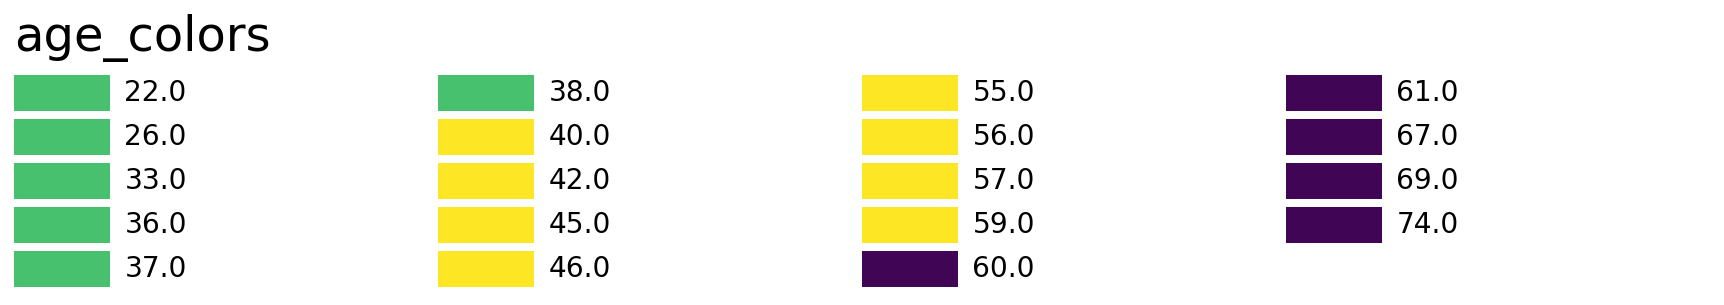

In [11]:
plot_colortable(age_color_dict,'age_colors',sort_colors=False)
plt.savefig("./age_color_dict.pdf")

# Load the data

In [12]:
adata = sc.read_h5ad(
    "/data/angela/hpc/projects/tabula_sapiens/singlecell_transcriptomics/TSP1_30_Paper2_Version2d_Oct2024/full_object/TSP1_30_min200_2500_decontx_scvi_donorassay_version2d_20241126.h5ad"
)
adata

AnnData object with n_obs × n_vars = 1136218 × 61806
    obs: 'donor', 'tissue', 'anatomical_position', 'method', 'cdna_plate', 'library_plate', 'notes', 'cdna_well', 'old_index', 'assay', 'sample_id', 'replicate', '10X_run', '10X_barcode', 'ambient_removal', 'donor_method', 'donor_assay', 'donor_tissue', 'donor_tissue_assay', 'cell_ontology_class', 'cell_ontology_id', 'compartment', 'broad_cell_class', 'free_annotation', 'manually_annotated', 'published_2022', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc', 'pct_counts_ercc', '_scvi_batch', '_scvi_labels', 'scvi_leiden_donorassay_full', 'age', 'sex', 'ethnicity', 'sample_number'
    var: 'ensembl_id', 'gene_symbol', 'genome', 'mt', 'ercc', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: '_scvi_manager_uuid', '_scvi_uuid', '_training_mode', 'age_colors', 'assay_colors', 'compartment_colors', 'donor_colors', 'leiden', 'log1p', 'method_color

# Look at `n_genes` and `n_counts` across the dataset 

In [13]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

In [14]:
adata = remove_cats(adata)
metadata = adata.obs.copy()

In [15]:
metadata["cellId"] = metadata.index
pd.DataFrame(metadata.groupby(['tissue','donor',])['cellId'].count())

cellId
tissue      donor        
Bladder     TSP1    14498
            TSP14    3686
            TSP2    11486
            TSP21   15760
            TSP25   10300
...                   ...
Vasculature TSP14    9777
            TSP2     9304
            TSP21    9759
            TSP25   13741
            TSP27      69

[123 rows x 1 columns]

In [16]:
donors_v2 = [
    'TSP17',
    'TSP19',
    'TSP20',
    'TSP21',
    'TSP25',
    'TSP26',
    'TSP27',
    'TSP28',
    'TSP30'
]
metadata = metadata[metadata.donor.isin(donors_v2)].copy()

In [19]:
metadata["cellId"] = metadata.index

In [ ]:
pd.DataFrame(metadata.groupby(['donor','tissue','method'])['cellId'].count())

In [20]:
metadata.columns

Index(['donor', 'tissue', 'anatomical_position', 'method', 'cdna_plate',
       'library_plate', 'notes', 'cdna_well', 'old_index', 'assay',
       'sample_id', 'replicate', '10X_run', '10X_barcode', 'ambient_removal',
       'donor_method', 'donor_assay', 'donor_tissue', 'donor_tissue_assay',
       'cell_ontology_class', 'cell_ontology_id', 'compartment',
       'broad_cell_class', 'free_annotation', 'manually_annotated',
       'published_2022', 'n_genes_by_counts', 'total_counts',
       'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc',
       'pct_counts_ercc', '_scvi_batch', '_scvi_labels',
       'scvi_leiden_donorassay_full', 'age', 'sex', 'ethnicity',
       'sample_number', 'log1p_n_genes_by_counts', 'log1p_total_counts',
       'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes',
       'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'cellId'],
      dtype='object')

In [21]:
donors_color_dict.keys()

dict_keys(['TSP1', 'TSP2', 'TSP3', 'TSP4', 'TSP5', 'TSP6', 'TSP7', 'TSP8', 'TSP9', 'TSP10', 'TSP11', 'TSP12', 'TSP13', 'TSP14', 'TSP15', 'TSP17', 'TSP19', 'TSP20', 'TSP21', 'TSP25', 'TSP26', 'TSP27', 'TSP28', 'TSP30'])

In [22]:
donors_v2

['TSP17',
 'TSP19',
 'TSP20',
 'TSP21',
 'TSP25',
 'TSP26',
 'TSP27',
 'TSP28',
 'TSP30']

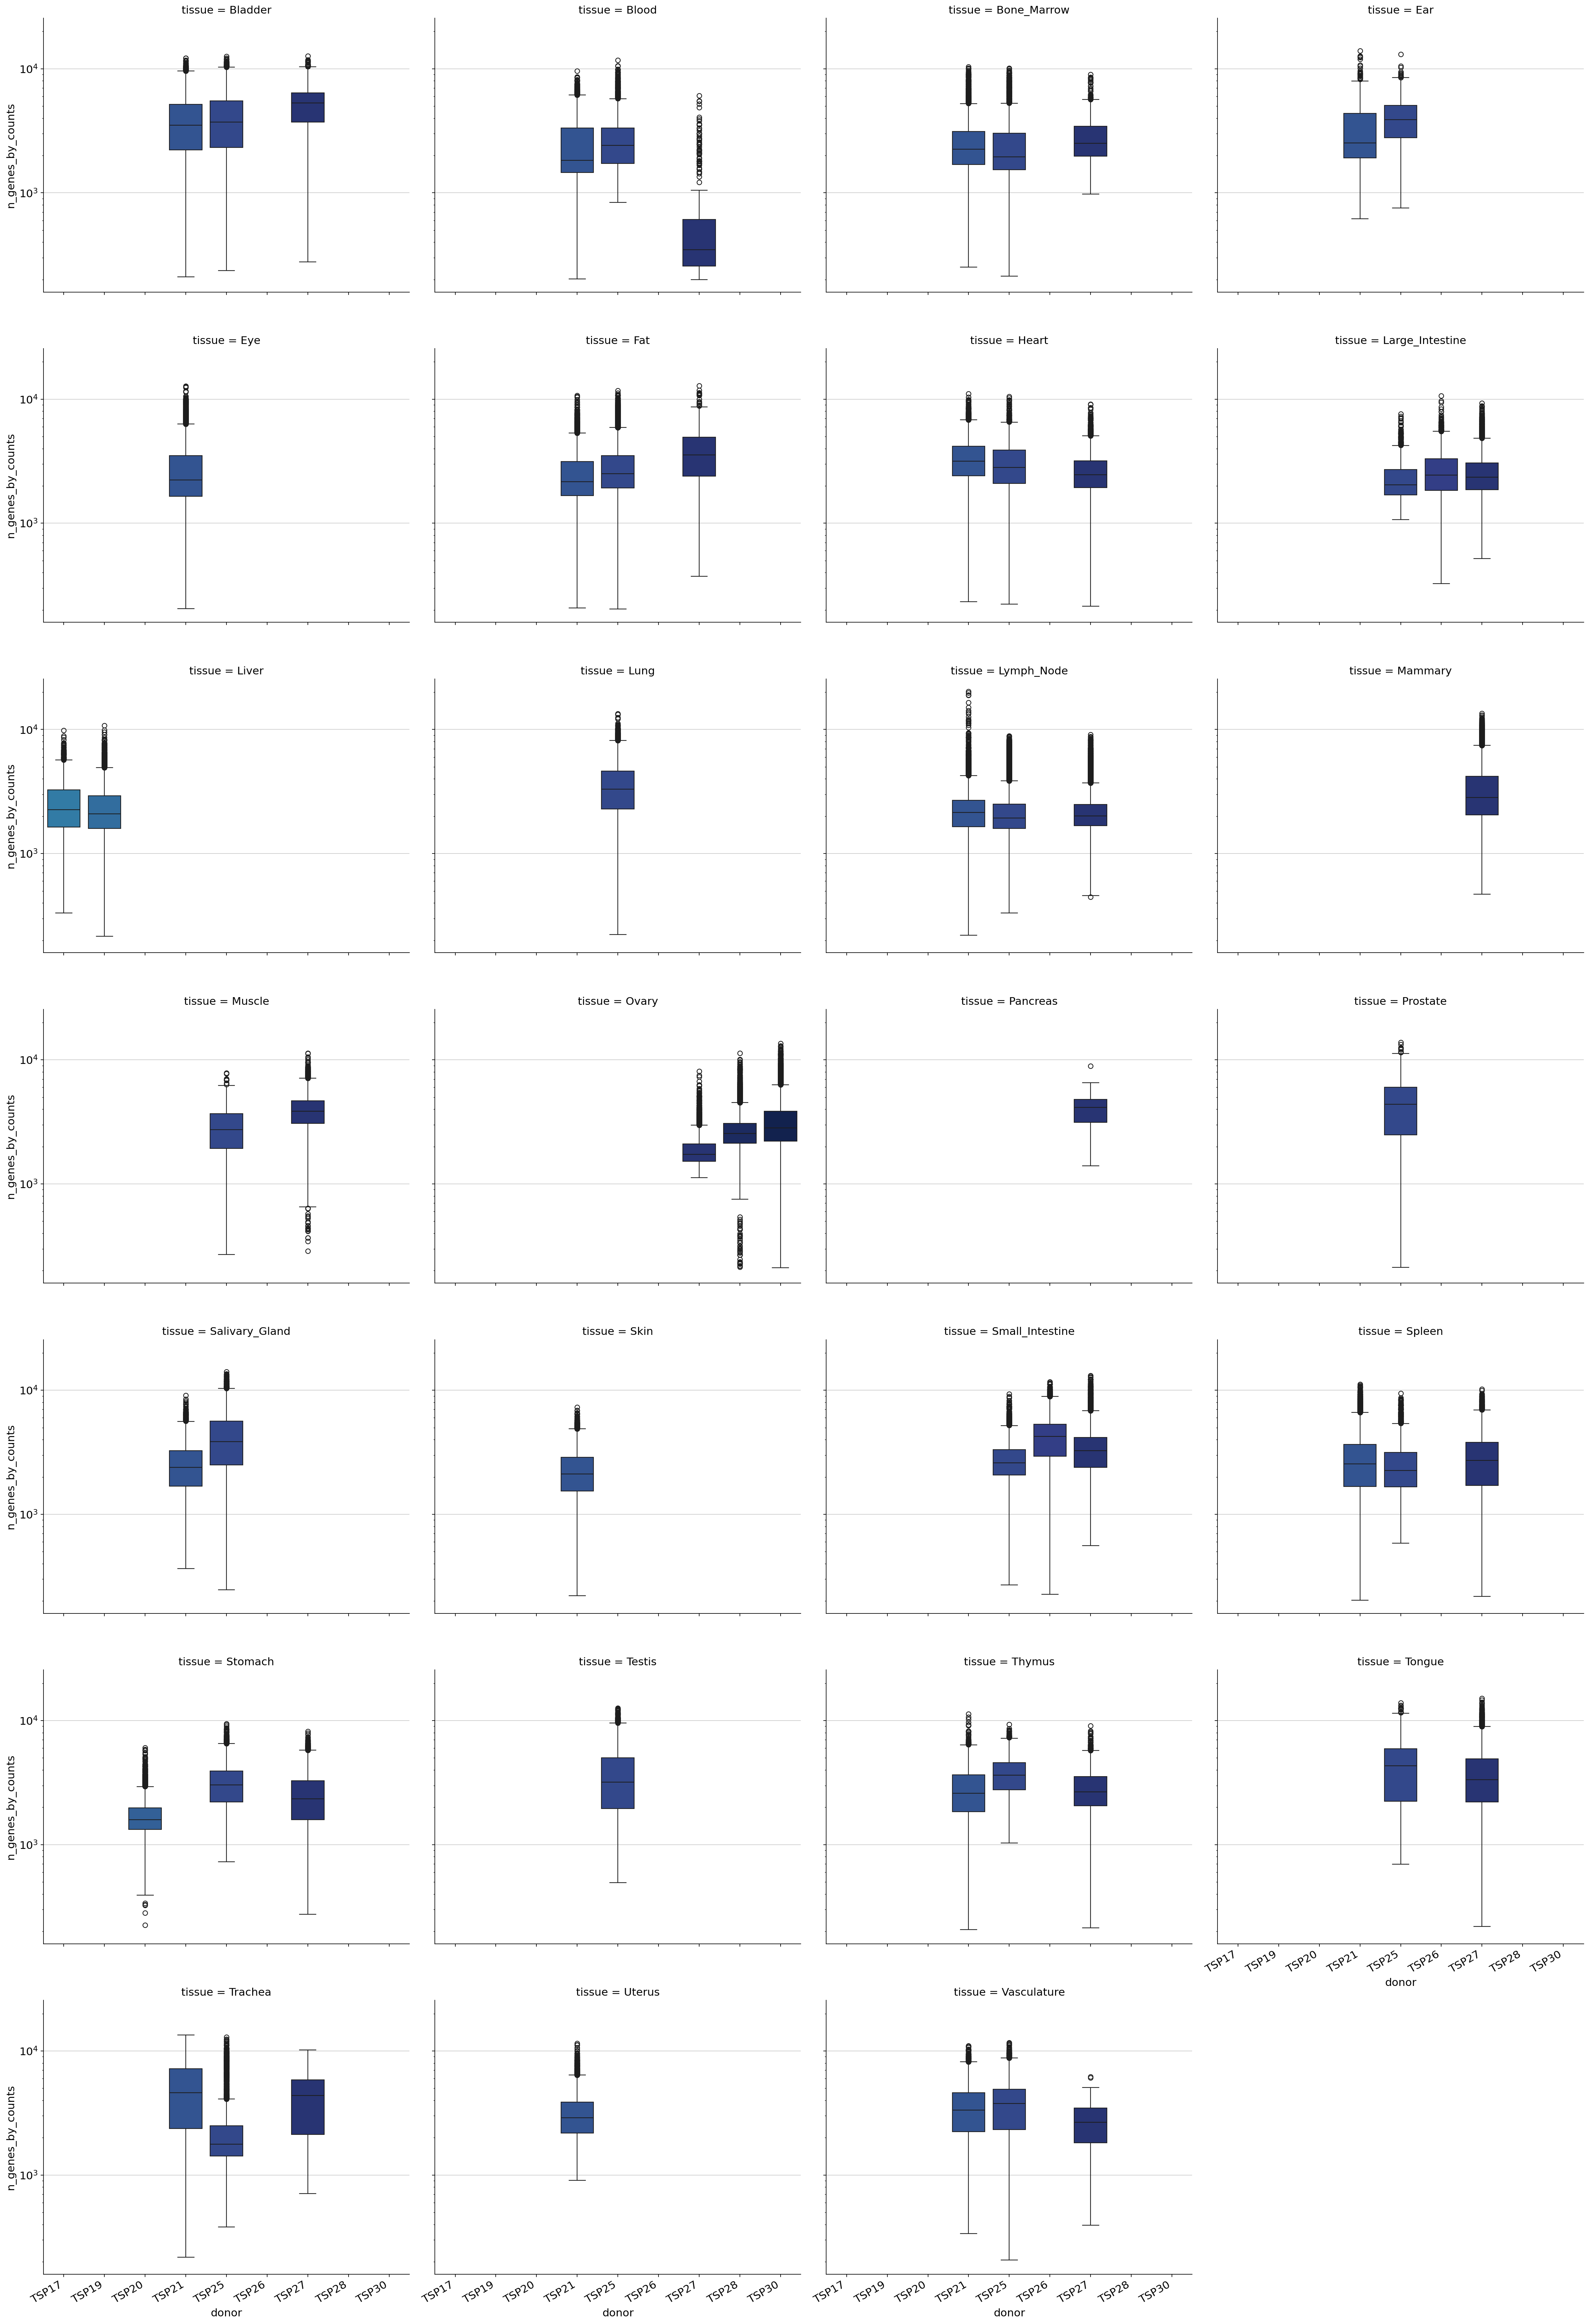

In [33]:
# Run for 10x genes
df = metadata[metadata['method'] == '10X']
tissue_order = list(set(df["tissue"]))
tissue_order.sort()

# Create FacetGrid
g = sns.FacetGrid(
    df, 
    col="tissue", 
    col_wrap=4, 
    height=6, 
    aspect=1.2, 
    col_order=tissue_order
)

# number of genes
def boxplot_with_colors(data, **kwargs):
    sns.boxplot(
        data=data,
        x="donor",
        y="n_genes_by_counts",
        hue="donor",  # Fix the warning
        order=donors_v2,
        palette=donors_color_dict,
        dodge=False,
        legend=False,
        **kwargs
    )

g.map_dataframe(boxplot_with_colors)
g.set(yscale='log')
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment('right')

plt.tight_layout()
plt.savefig("figures/paper2/ts_10X_ngenes.pdf")


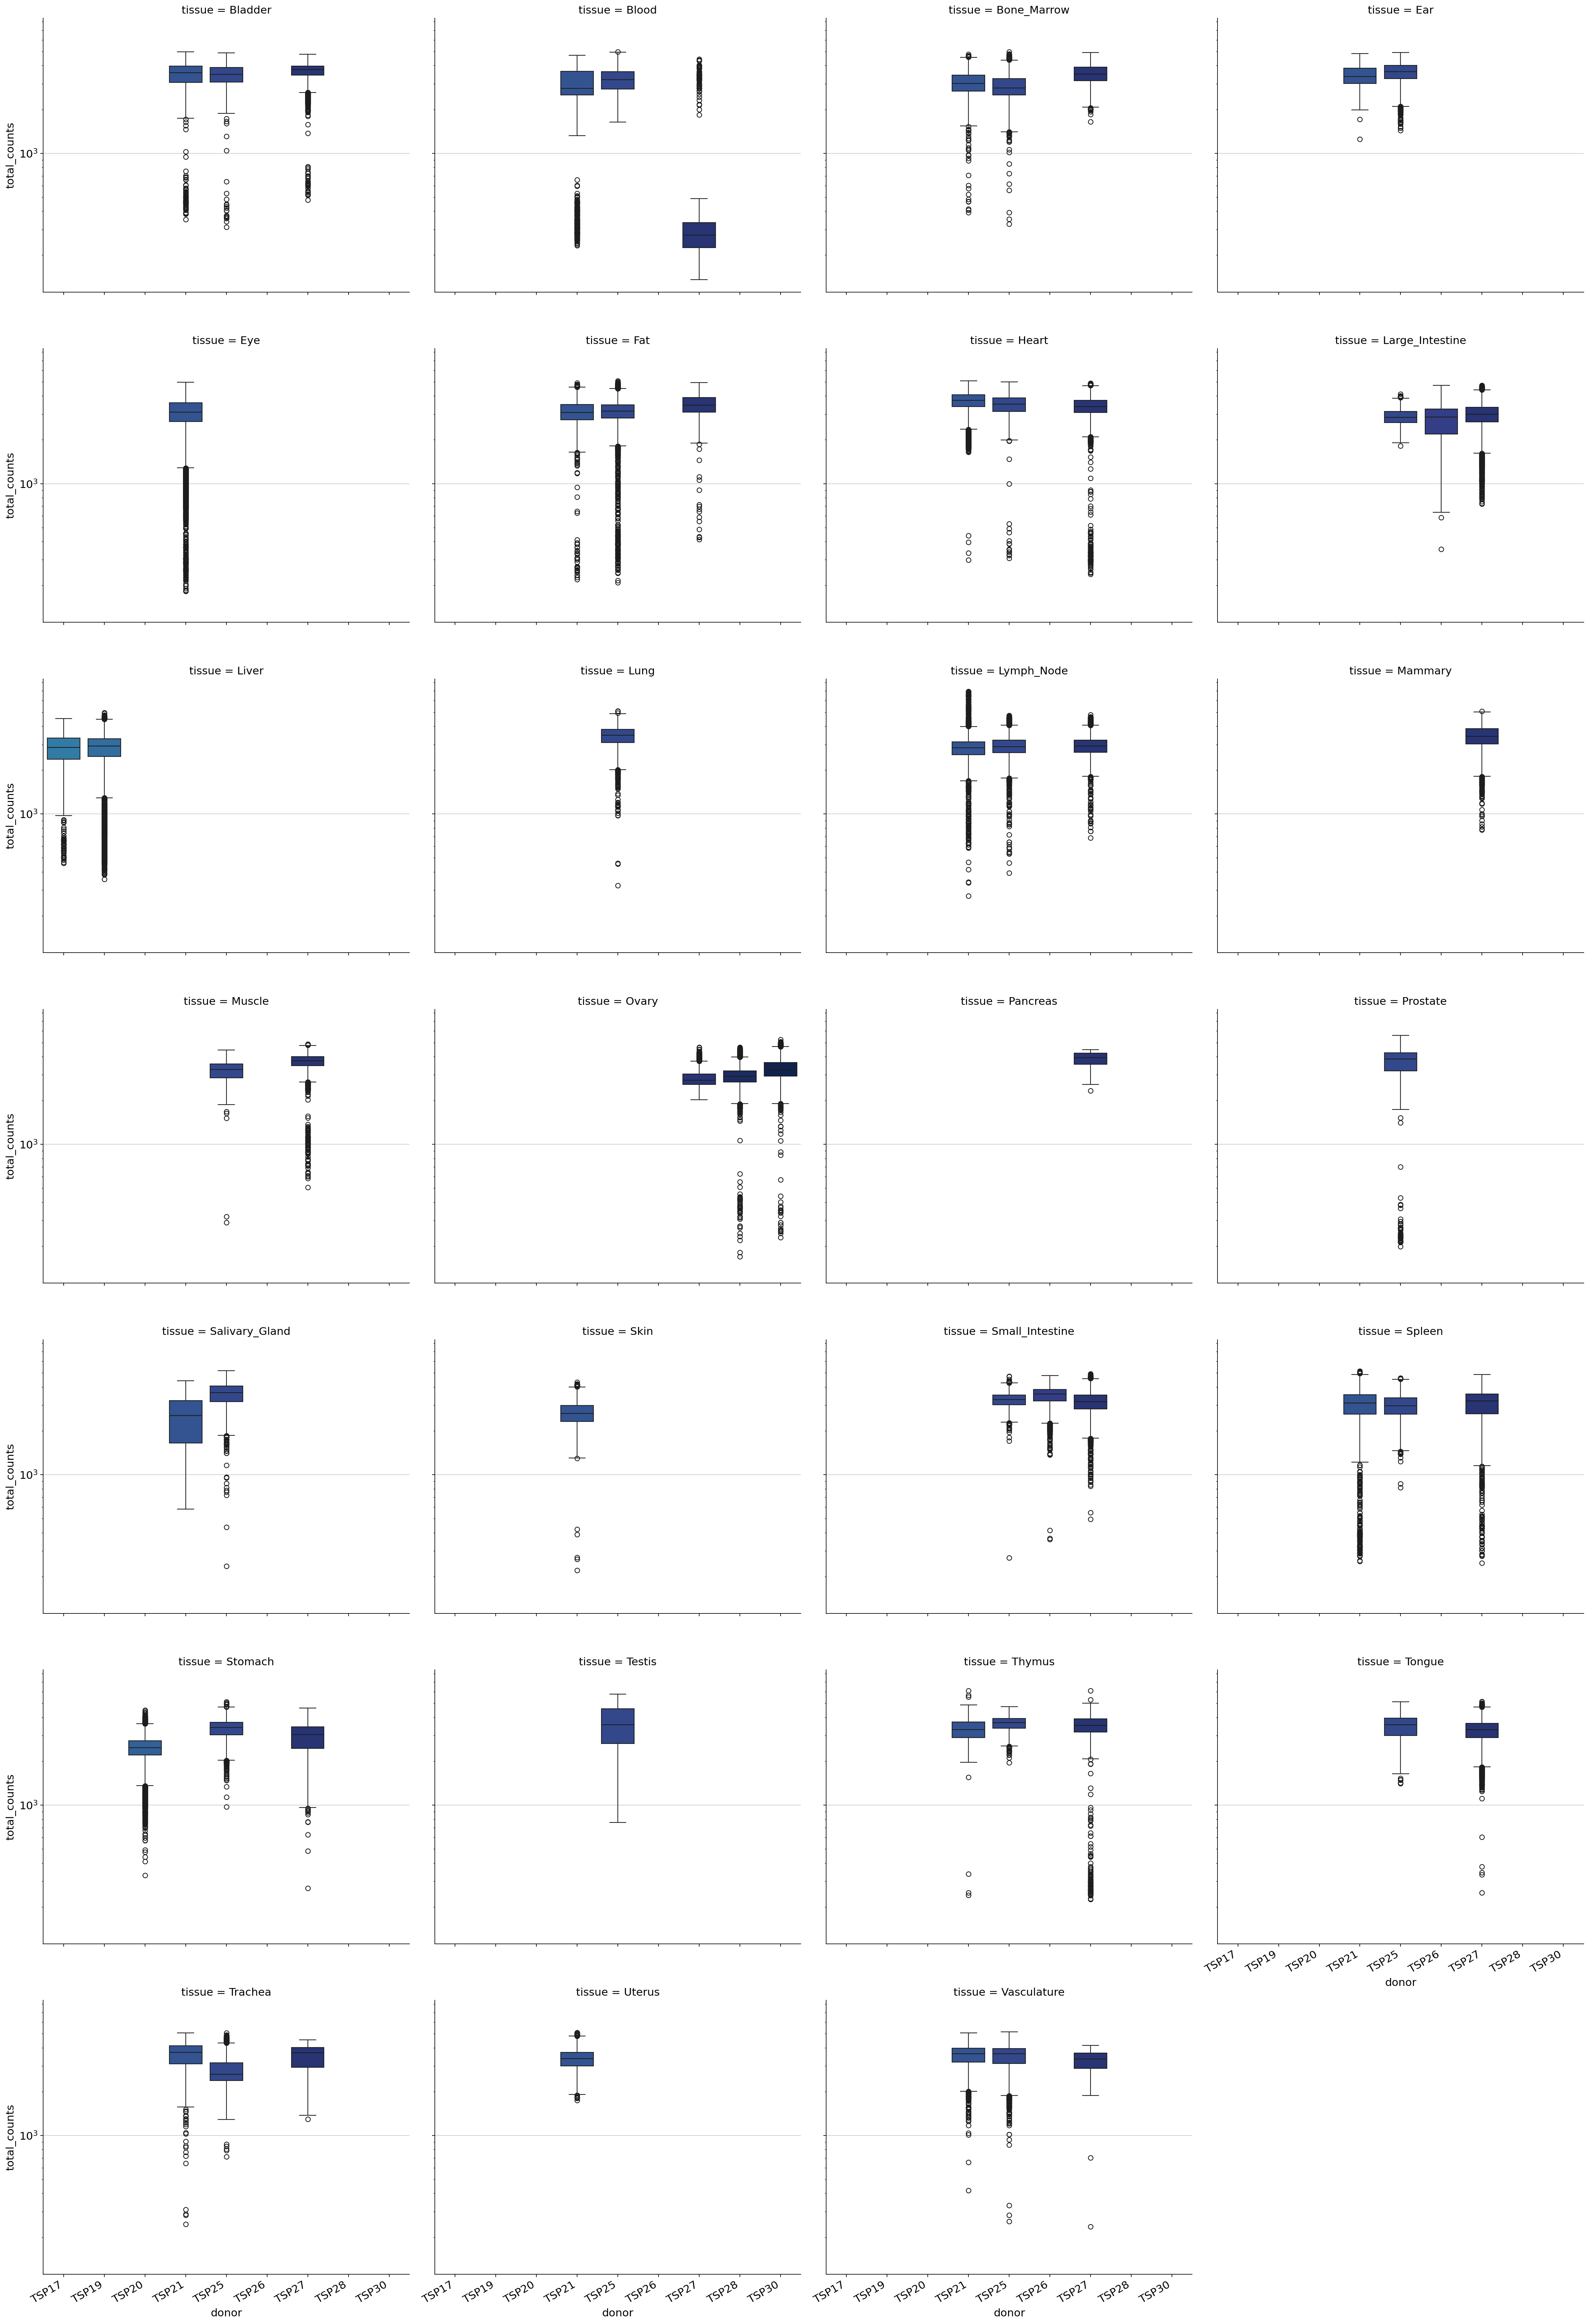

In [34]:
# Run for 10x counts
df = metadata[metadata['method'] == '10X']
tissue_order = list(set(df["tissue"]))
tissue_order.sort()

# Create FacetGrid
g = sns.FacetGrid(
    df, 
    col="tissue", 
    col_wrap=4, 
    height=6, 
    aspect=1.2, 
    col_order=tissue_order
)

# number of counts
def boxplot_with_colors(data, **kwargs):
    sns.boxplot(
        data=data,
        x="donor",
        y="total_counts",
        hue="donor",  # Fix the warning
        order=donors_v2,
        palette=donors_color_dict,
        dodge=False,
        legend=False,
        **kwargs
    )

g.map_dataframe(boxplot_with_colors)
g.set(yscale='log')
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment('right')

plt.tight_layout()
plt.savefig("figures/paper2/ts_10X_ncounts.pdf")


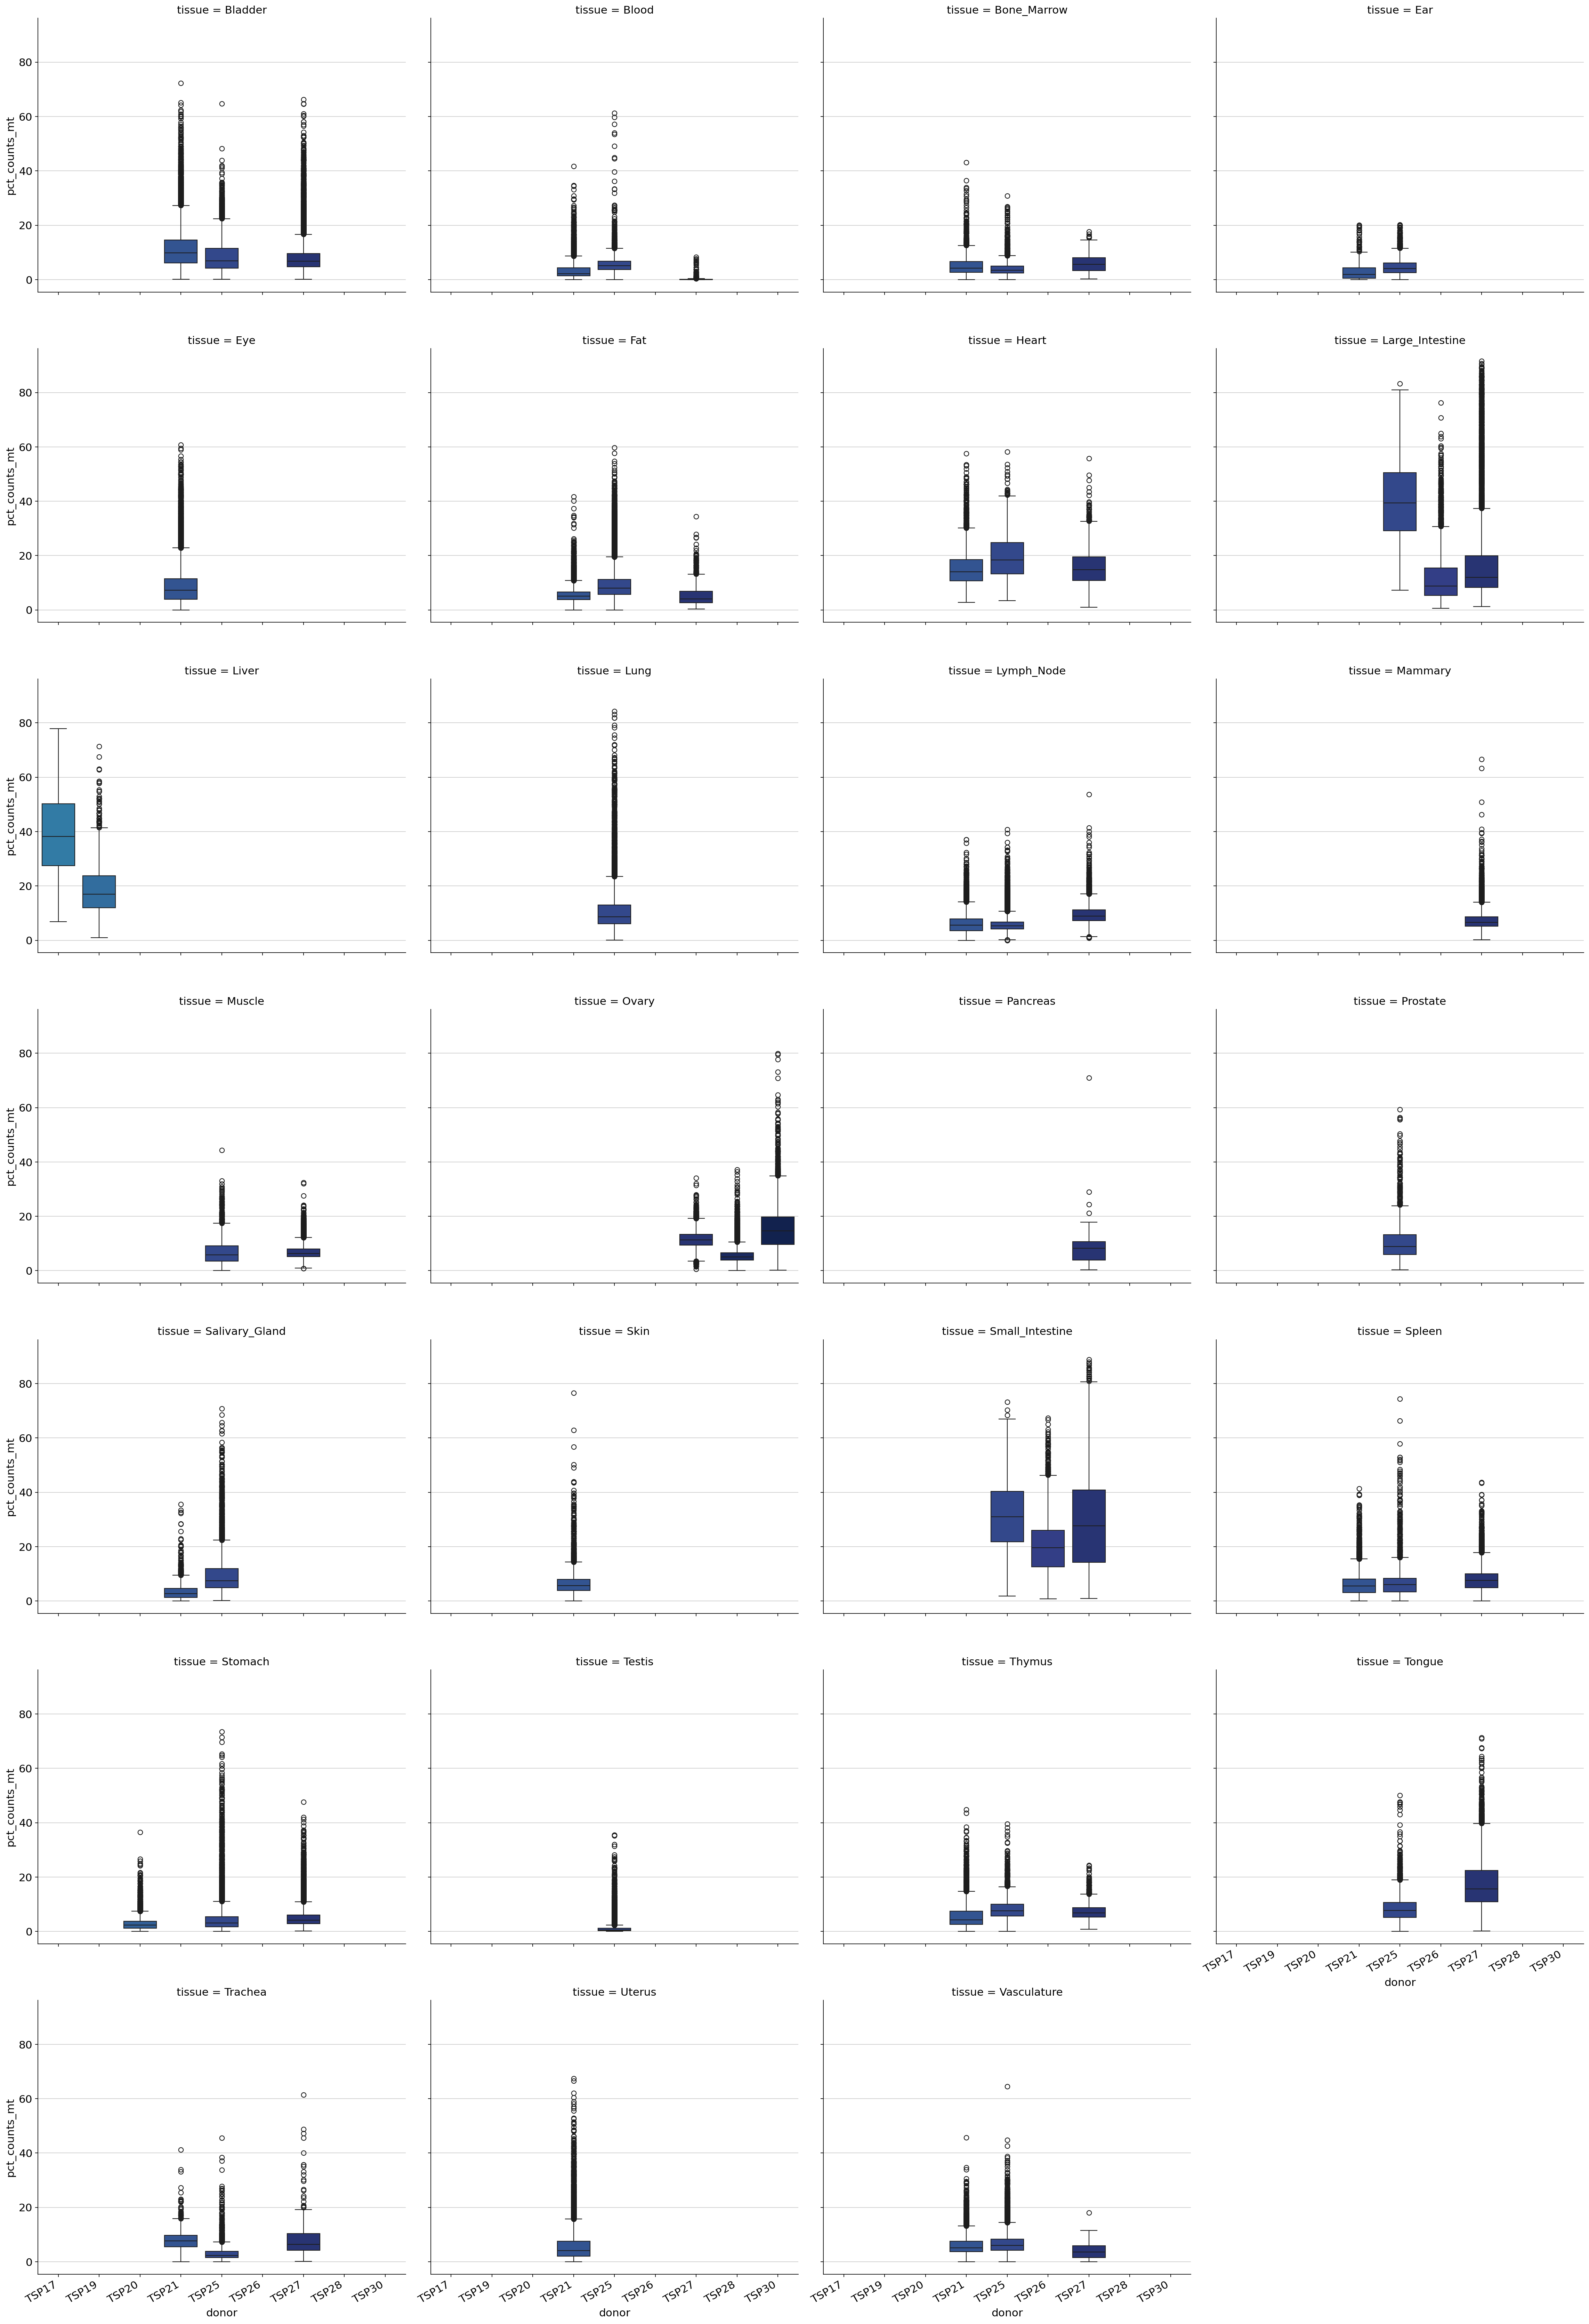

In [39]:
# Run for 10x %mt
df = metadata[metadata['method'] == '10X']
tissue_order = list(set(df["tissue"]))
tissue_order.sort()

# Create FacetGrid
g = sns.FacetGrid(
    df, 
    col="tissue", 
    col_wrap=4, 
    height=6, 
    aspect=1.2, 
    col_order=tissue_order
)

# number of counts
def boxplot_with_colors(data, **kwargs):
    sns.boxplot(
        data=data,
        x="donor",
        y="pct_counts_mt",
        hue="donor",  # Fix the warning
        order=donors_v2,
        palette=donors_color_dict,
        dodge=False,
        legend=False,
        **kwargs
    )

g.map_dataframe(boxplot_with_colors)
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment('right')

plt.tight_layout()
plt.savefig("figures/paper2/ts_10X_pct_counts_mt.pdf")


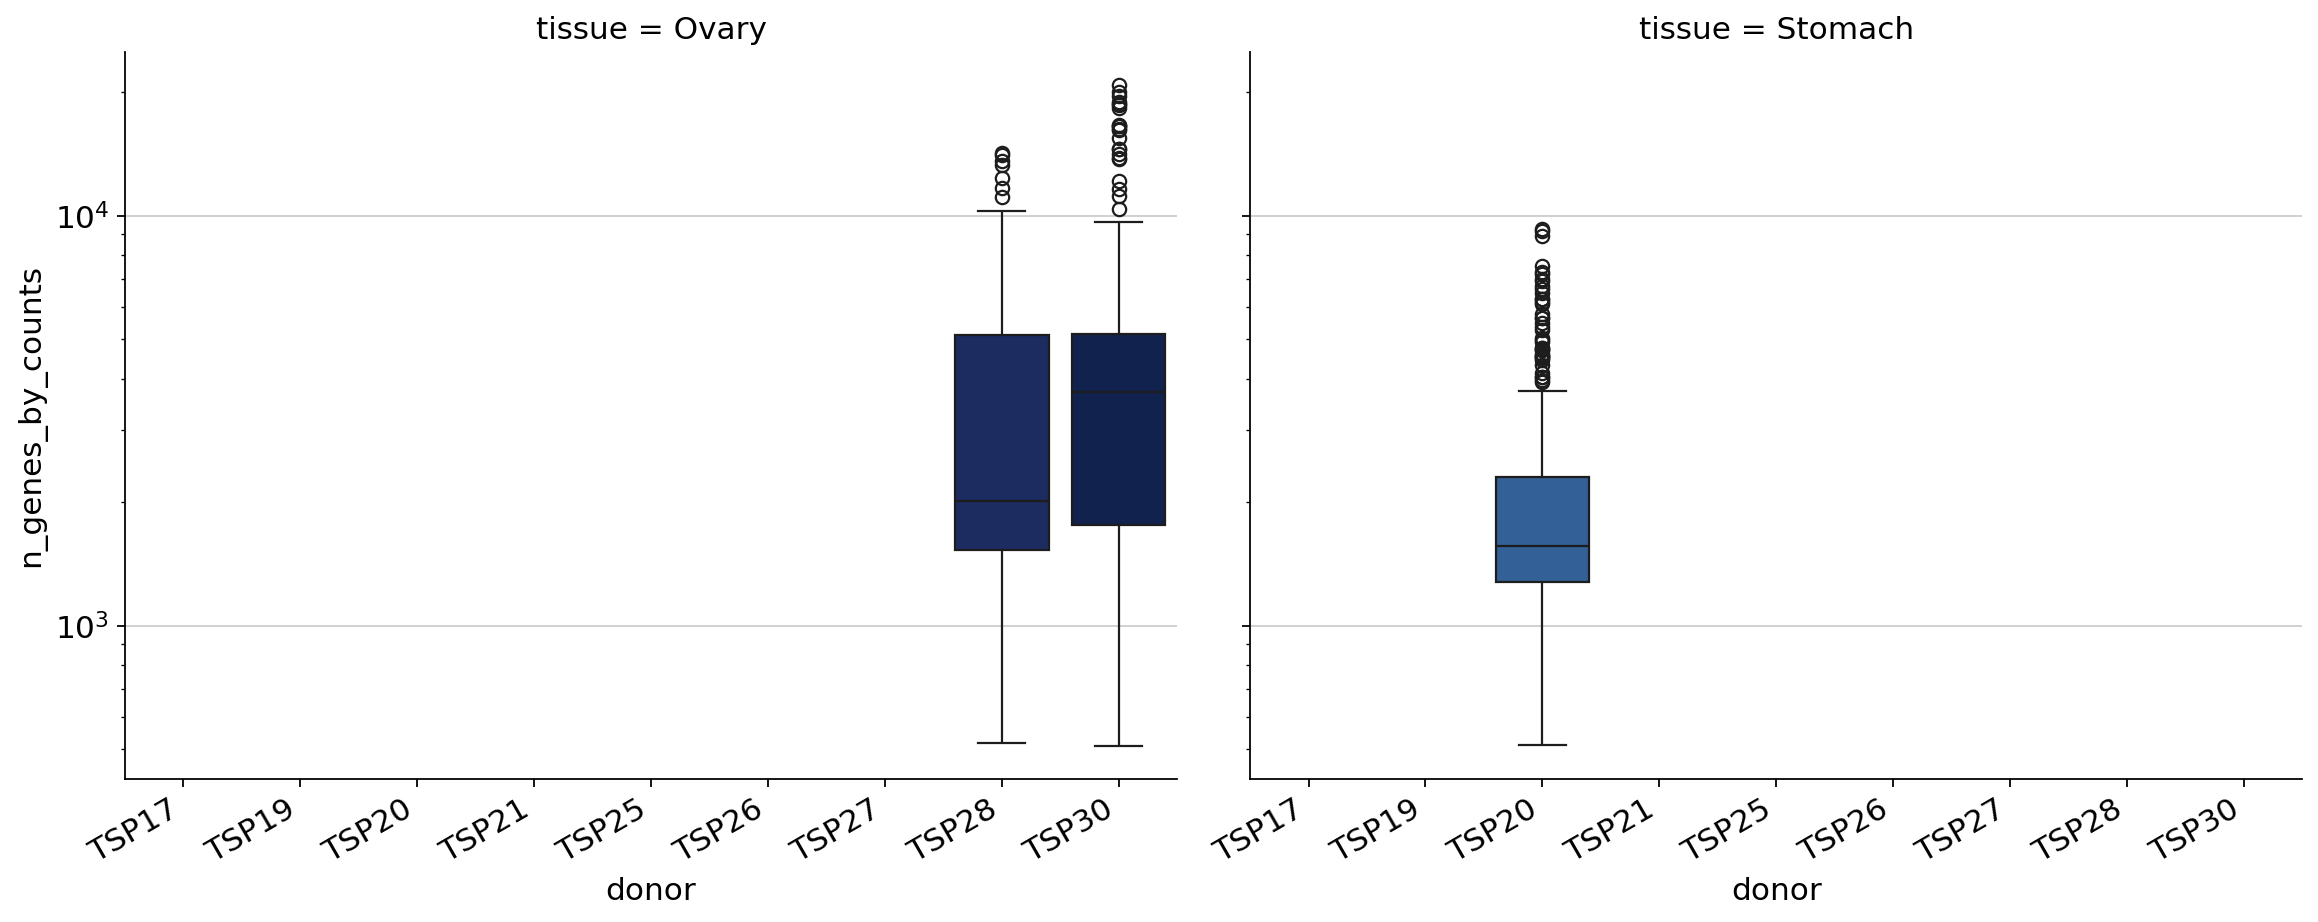

In [35]:
# Run for smartseq2 genes
df = metadata[metadata['method'] == 'smartseq']
tissue_order = list(set(df["tissue"]))
tissue_order.sort()

# Create FacetGrid
g = sns.FacetGrid(
    df, 
    col="tissue", 
    col_wrap=4, 
    height=6, 
    aspect=1.2, 
    col_order=tissue_order
)

# number of genes
def boxplot_with_colors(data, **kwargs):
    sns.boxplot(
        data=data,
        x="donor",
        y="n_genes_by_counts",
        hue="donor",  # Fix the warning
        order=donors_v2,
        palette=donors_color_dict,
        dodge=False,
        legend=False,
        **kwargs
    )

g.map_dataframe(boxplot_with_colors)
g.set(yscale='log')
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment('right')

plt.tight_layout()
plt.savefig("figures/paper2/ts_smartseq2_ngenes.pdf")

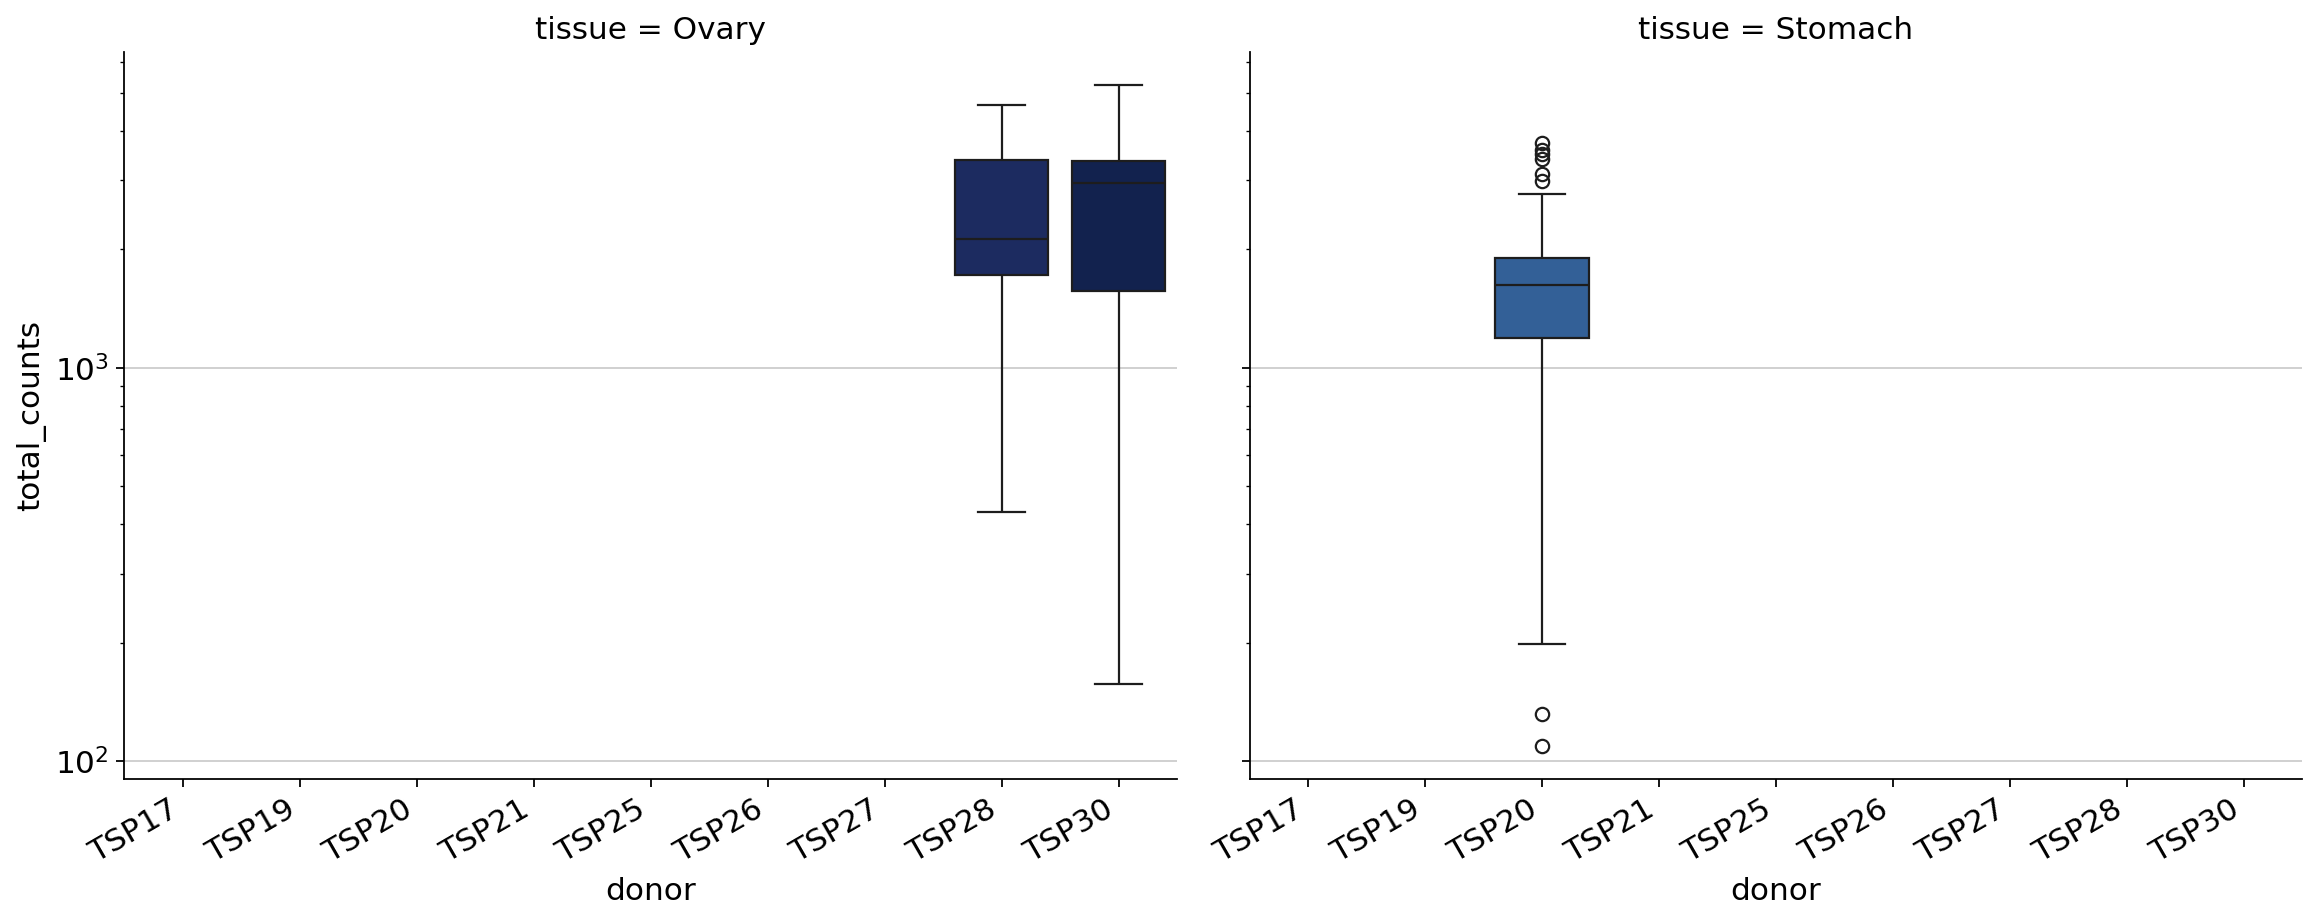

In [36]:
# Run for smartseq2 counts
df = metadata[metadata['method'] == 'smartseq']
tissue_order = list(set(df["tissue"]))
tissue_order.sort()

# Create FacetGrid
g = sns.FacetGrid(
    df, 
    col="tissue", 
    col_wrap=4, 
    height=6, 
    aspect=1.2, 
    col_order=tissue_order
)

# number of counts
def boxplot_with_colors(data, **kwargs):
    sns.boxplot(
        data=data,
        x="donor",
        y="total_counts",
        hue="donor",  # Fix the warning
        order=donors_v2,
        palette=donors_color_dict,
        dodge=False,
        legend=False,
        **kwargs
    )

g.map_dataframe(boxplot_with_colors)
g.set(yscale='log')
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment('right')

plt.tight_layout()
plt.savefig("figures/paper2/ts_smartseq2_ncounts.pdf")

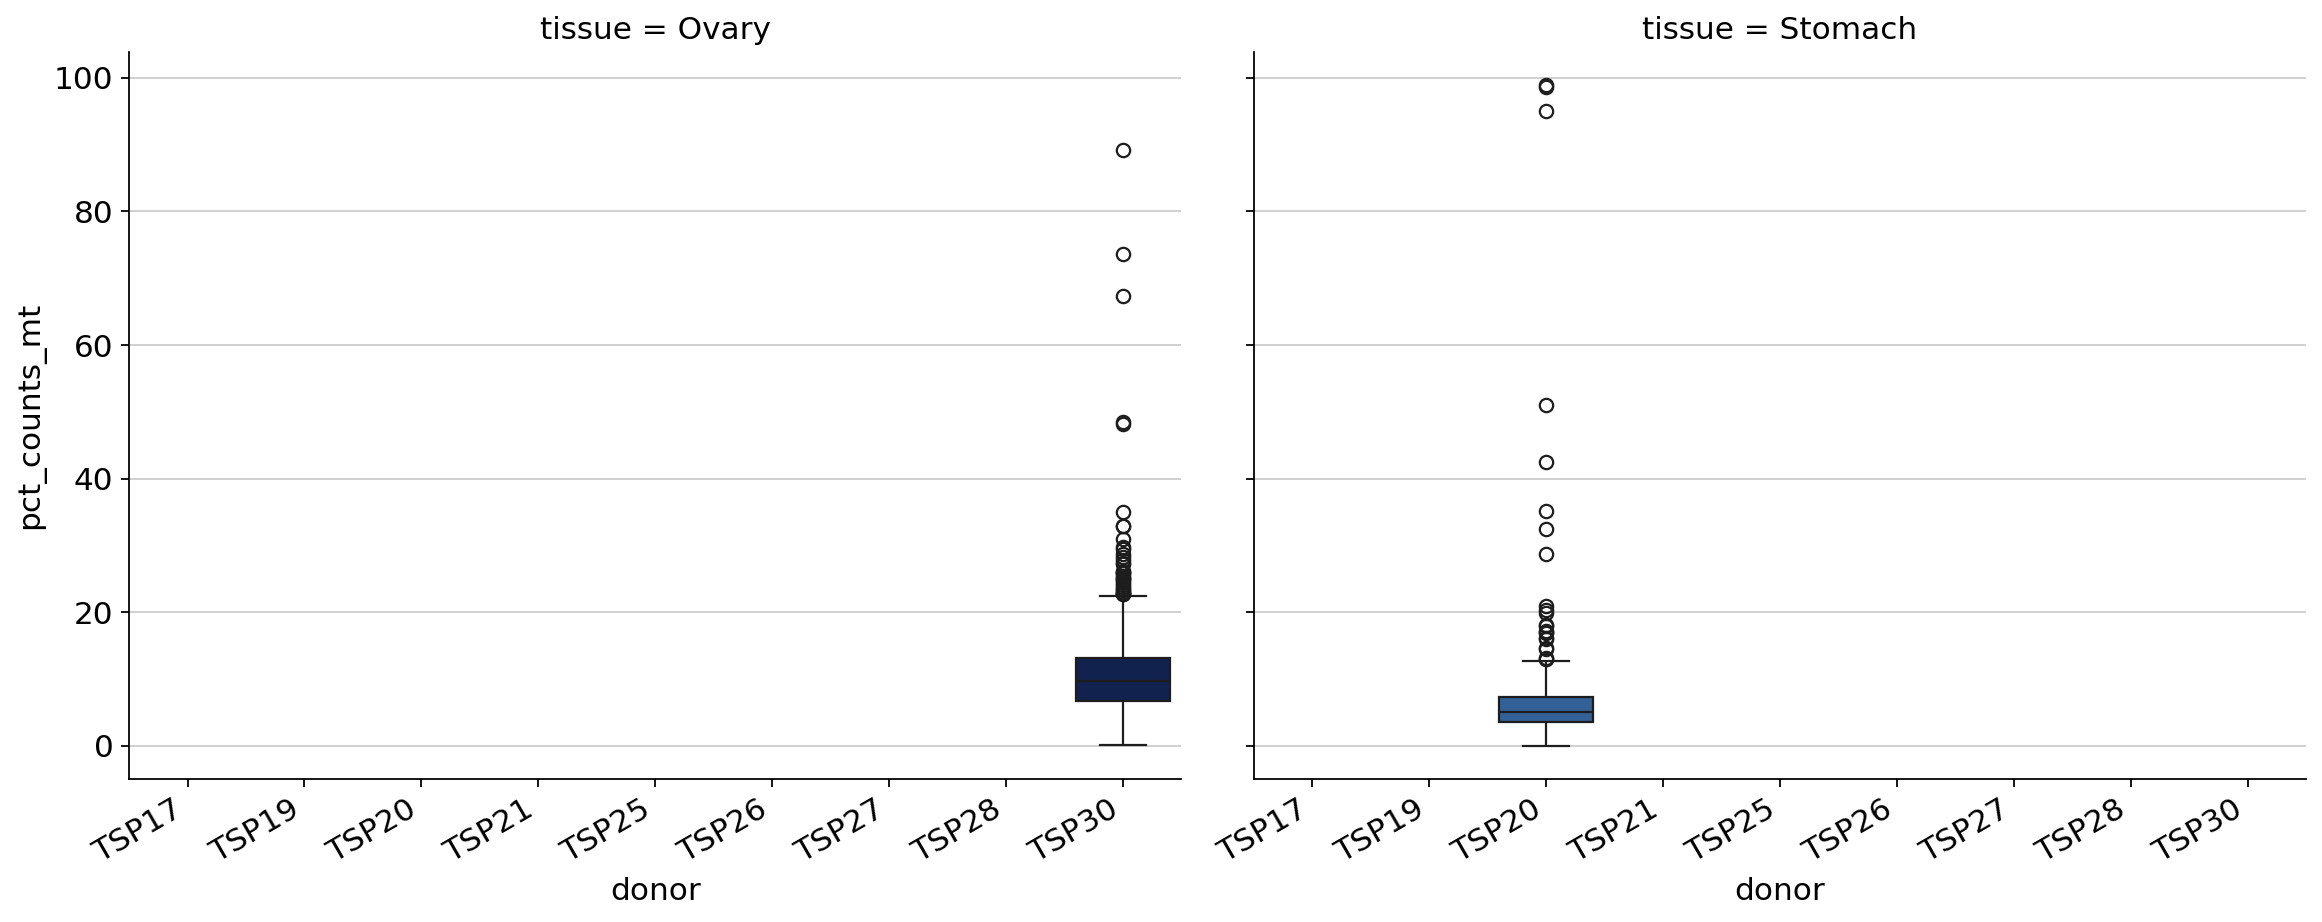

In [40]:
# Run for smartseq2 counts
df = metadata[metadata['method'] == 'smartseq']
tissue_order = list(set(df["tissue"]))
tissue_order.sort()

# Create FacetGrid
g = sns.FacetGrid(
    df, 
    col="tissue", 
    col_wrap=4, 
    height=6, 
    aspect=1.2, 
    col_order=tissue_order
)

# number of counts
def boxplot_with_colors(data, **kwargs):
    sns.boxplot(
        data=data,
        x="donor",
        y="pct_counts_mt",
        hue="donor",  # Fix the warning
        order=donors_v2,
        palette=donors_color_dict,
        dodge=False,
        legend=False,
        **kwargs
    )

g.map_dataframe(boxplot_with_colors)
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment('right')

plt.tight_layout()
plt.savefig("figures/paper2/ts_smartseq2_pct_counts_mt.pdf")

In [ ]:
adata.obs.columns

In [ ]:
print('all',len(set(adata.obs['cell_ontology_type'])))
for c in set(adata.obs['compartment']):
    comp = adata.obs[adata.obs['compartment']==c]
    print(c,len(set(comp['cell_ontology_type'])))
for t in set(adata.obs['tissue']):
    tiss = adata.obs[adata.obs['tissue']==t]
    
    print(t,len(set(tiss['cell_ontology_type'])))

In [ ]:
pwd

In [ ]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('SuppTab2_DatasetSummaryStats.xlsx', engine='xlsxwriter')

# number cells per tissue and compartment and cell type and donor and method.
adata = remove_cats(adata)
df = adata.obs.copy()
df = pd.DataFrame(df.groupby(["tissue","compartment","cell_ontology_class","method","donor"])["cell_identifier"].count())
df = df.rename(columns={"cell_identifier":"number of cells"})
df.to_excel(writer, sheet_name='all')

# number cells per tissue and compartment and cell type.
df = adata.obs.copy()
df = pd.DataFrame(df.groupby(["tissue","compartment","cell_ontology_class"])["cell_identifier"].count())
df = df.rename(columns={"cell_identifier":"number of cells"})
df.to_excel(writer, sheet_name='tissue_compartment_cell-type')

# number cells per tissue and donor and cell type.
df = adata.obs.copy()
df = pd.DataFrame(df.groupby(["tissue","cell_ontology_class","donor"])["cell_identifier"].count())
df = df.rename(columns={"cell_identifier":"number of cells"})
df.to_excel(writer, sheet_name='tissue_donor_cell-type')

# number cells per tissue per cell type.
df = adata.obs.copy()
df = pd.DataFrame(df.groupby(["tissue","cell_ontology_class"])["cell_identifier"].count())
df = df.rename(columns={"cell_identifier":"number of cells"})
df.to_excel(writer, sheet_name='tissue_cell-type')

# number cells per tissue.
df = adata.obs.copy()
df = pd.DataFrame(df.groupby(["tissue"])["cell_identifier"].count())
df = df.rename(columns={"cell_identifier":"number of cells"})
df.to_excel(writer, sheet_name='tissue')

# number cells per donor.
df = adata.obs.copy()
df = pd.DataFrame(df.groupby(["donor"])["cell_identifier"].count())
df = df.rename(columns={"cell_identifier":"number of cells"})
df.to_excel(writer, sheet_name='donor')

# number cells per compartment.
df = adata.obs.copy()
df = pd.DataFrame(df.groupby(["compartment"])["cell_identifier"].count())
df = df.rename(columns={"cell_identifier":"number of cells"})
df.to_excel(writer, sheet_name='compartment')

# number cells per cell type.
df = adata.obs.copy()
df = pd.DataFrame(df.groupby(["cell_ontology_class"])["cell_identifier"].count())
df = df.rename(columns={"cell_identifier":"number of cells"})
df.to_excel(writer, sheet_name='cell_type')

# number cells per cell type and free annotations.
df = adata.obs.copy()
df = pd.DataFrame(df.groupby(["cell_ontology_class","free_annotation"])["cell_identifier"].count())
df = df.rename(columns={"cell_identifier":"number of cells"})
df.to_excel(writer, sheet_name='cell-type_free-annotation')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [ ]:
adata

## make object for OnClass

In [ ]:
adata_counts = sc.AnnData(
    obs=adata.obs.copy(),
    X = adata.layers["decontXcounts"],
    var=adata.var.copy()
)
adata_counts

In [ ]:
adata_counts.write("/mnt/ibm_lg/angela/sapiens/data/TSP1_TSP15/TSP1_TSP15_metadata_counts.h5ad")




## check splicing object

In [ ]:
adata_splicing = sc.read_h5ad("/mnt/ibm_lg/angela/sapiens/data/TS_Splicing.h5ad")
adata_splicing

In [ ]:
adata_splicing.obs['sex'] = 'female'

adata_splicing.obs.loc[
    adata_splicing.obs[
        adata_splicing.obs['donor'].isin(['TSP6','TSP8','TSP9','TSP10','TSP11','TSP12','TSP13','TSP14','TSP15'])].index,'sex'] = 'male'



In [ ]:
adata_splicing.var

In [ ]:
sc.pl.umap(adata_splicing,color="unknown_chrM_0_SpliZ")

In [ ]:
adata_splicing = remove_cats(adata_splicing)
adata_splicing.obs = adata_splicing.obs[['tissue', 'subtissue', 'method', 'donor', 'anatomical_position', 'n_counts', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex']]
adata_splicing.obs['anatomical_position'] = adata_splicing.obs['anatomical_position'].fillna(adata_splicing.obs['subtissue'])
adata_splicing.obs = adata_splicing.obs.drop("subtissue",axis =1)
adata_splicing.obs.columns = [
    "organ_tissue", "method","donor","anatomical_information", 
    "n_counts_UMIs", "n_genes",
    "cell_ontology_class", "free_annotation",
       "manually_annotated", "compartment", "gender"   
]
adata_splicing.write("/mnt/ibm_lg/angela/sapiens/data/uploads_to_s3/v2_july_2021/TS_Splicing.h5ad")


## make objects for hosting + UMAPs

In [ ]:
adata

In [ ]:
adata_hosting = adata.copy()
adata_hosting.obs = adata_hosting.obs[['tissue', 'subtissue', 'method', 'donor', 'anatomical_position', 'n_counts', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex']]

In [ ]:
adata_hosting.obs.head()

In [ ]:
adata_hosting.obs['anatomical_position'] = adata_hosting.obs['anatomical_position'].fillna(adata_hosting.obs['subtissue'])
adata_hosting.obs = adata_hosting.obs.drop("subtissue",axis =1)

Donor: Set of donors available in the dataset. For details see the donor characteristics summary.
Organ: List of organs available in Tabula Sapiens.
Anatomical Information: If available, more specific information of where in the organ the cells were collected is provided.
Annotation: Cell type annotations using the Cell Ontology.
Compartment: Functional compartment for each cell type.
Manually Annotated: True or False, whether or not the corresponding value in Annotation has been manually verified by a tissue expert.
Predictability: Measure of how often the automatic annotation algorithms agree with the manual annotations, or with each other when manual annotations are not present.
Method: smartseq2 (full-length) or 10X (3prime)
The following numeric layers are available:
Raw counts: raw, not normalized counts.
Counts: decontX and normalized counts. Same as in .X slot at the time of download.

In [ ]:
adata_hosting

In [ ]:
adata_hosting.obs.columns = [
    "organ_tissue", "method","donor","anatomical_information", 
    "n_counts_UMIs", "n_genes",
    "cell_ontology_class", "free_annotation",
       "manually_annotated", "compartment", "gender"   
]

In [ ]:
donor : Set of donors available in the dataset. For details see the donor characteristics summary.
organ_tissue : List of organs available in Tabula Sapiens.
anatomical_information : If available, more specific information of where in the organ the cells were collected is provided.
gender : donor gender. For details see the donor characteristics summary.
cell_ontology_class : Cell type annotations using the Cell Ontology.
free_annotation : Cell type annotations using free text.
compartment : Functional compartment for each cell type.
manually_annotated : True or False, whether or not the corresponding value in Annotation has been manually verified by a tissue expert.
n_counts_UMIs : number of counts (smartseq2) or UMIs (10x) per cell.
n_genes : number of genes per cell.
method : smartseq2 (full-length) or 10X (3prime)
The following numeric layers are available:
.layers["raw_counts"] : raw, not normalized counts.
.layers["decontXcounts"] : decontX counts.
.raw.X : normalized decontX counts.
.X : normalized and scaled decontX counts.

In [ ]:
adata_hosting

In [ ]:
adata_hosting.uns['donor_colors'] = list(donors_color_dict.values())
adata_hosting.uns['method_colors'] = list(methods_color_dict.values())
adata_hosting.uns['compartment_colors'] = list(compartments_color_dict.values())
adata_hosting.uns['organ_tissue_colors'] = list(tissues_color_dict.values())

In [ ]:
adata_hosting.write("/mnt/ibm_lg/angela/sapiens/data/uploads_to_s3/v2_july_2021/TabulaSapiens.h5ad")
sc.pl.umap(adata_hosting,color=["organ_tissue"],save = "_uploads_TabulaSapiens.png")


In [ ]:
for c in set(adata_hosting.obs["compartment"]):
    print(c)
    comp = adata_hosting[adata_hosting.obs["compartment"]==c].copy()
    
    sc.pp.neighbors(comp, use_rep="X_scvi")
    sc.tl.umap(comp)
    sc.pl.umap(comp,color=["organ_tissue"],save = "_uploads_"+c+".png")
    comp.write("/mnt/ibm_lg/angela/sapiens/data/uploads_to_s3/v2_july_2021/TS_"+c+".h5ad")
    


## portal UMAPs

In [ ]:
for t in set(adata_hosting.obs["organ_tissue"]):
    print(t)
    tiss = adata_hosting[adata_hosting.obs["organ_tissue"]==t].copy()
    
    sc.pp.neighbors(tiss, use_rep="X_scvi")
    sc.tl.umap(tiss)
    sc.pl.umap(tiss,color=["cell_ontology_class"],save = "_uploads_"+t+".png")
#     tiss.write("/mnt/ibm_lg/angela/sapiens/data/uploads_to_s3/v2_july_2021/TS_"+t+".h5ad")
    


In [ ]:
pwd

In [ ]:
adata

In [ ]:
adata = remove_cats(adata)

In [ ]:
count_cell_types = 0
for t in set(adata.obs['tissue']):
    tiss = adata[adata.obs["tissue"]==t].copy()
    tiss = remove_cats(tiss)
    count_cell_types = count_cell_types + len(set(tiss.obs["free_annotation"]))
count_cell_types

In [ ]:
set(adata.obs["free_annotation"].astype(str) + "_" + adata.obs["tissue"].astype(str))

In [ ]:
len(set(adata.obs["cell_ontology_class"]))

In [ ]:
len(set(adata.obs["tissue_cell_type"]))

In [ ]:
adata = sc.read_h5ad(
    "/data/angela/hpc/projects/tabula_sapiens/singlecell_transcriptomics/TSP1_30_Paper2_Version2d_Oct2024/tissues/
)
adata

## portal UMAPs

In [ ]:
import os
tissue_obsj = list(set(os.listdir("/data/angela/hpc/projects/tabula_sapiens/singlecell_transcriptomics/TSP1_30_Paper2_Version2d_Oct2024/tissues/")) -set(['.ipynb_checkpoints','Untitled.ipynb']))

tissue_obsj


In [ ]:
output_dir = 'figures/'
os.makedirs(output_dir, exist_ok=True)

In [ ]:
folder_prefix = "/data/angela/hpc/projects/tabula_sapiens/singlecell_transcriptomics/TSP1_30_Paper2_Version2d_Oct2024/tissues/"

# for t in tissue_obsj:
#     tissue = t.split("_TSP1")[0]
#     print(tissue)
#     tiss = sc.read_h5ad(folder_prefix+t)
#     if len(tissue.split("_")) == 1:
#         tissuename = tissue + " cell types"
#     else:
#         tissuename = tissue.split("_")[0] + " " + tissue.split("_")[1] + " cell types"

#     sc.pl.umap(tiss,color=["cell_ontology_class"],title = tissuename,save = "_uploads_"+tissue+".png")


for t in tissue_obsj:
    tissue = t.split("_TSP1")[0]
    print(tissue)
    
    if len(tissue.split("_")) == 1:
        tissuename = tissue + " cell types"
    else:
        tissuename = tissue.split("_")[0] + " " + tissue.split("_")[1] + " cell types"
        tiss = sc.read_h5ad(folder_prefix+t)
        sc.pl.umap(tiss,color=["cell_ontology_class"],title = tissuename,save = "_uploads_"+tissue+".png")
  
